<a href="https://colab.research.google.com/github/lynnv-hub/Mind_Reading/blob/main/MindReading_Week1_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Function to install nilearn - Please run this first
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 33.8 MB/s eta 0:00:00


# Week 1: Exploring T1-weighted Images

In this tutorial, you will learn how to work with *NIfTI* files — the standard format for storing MRI data — using the Python package *Nibabel*.  

We assume you are already familiar with basic Python syntax as well as core NumPy and Matplotlib functionality. If you need a refresher, see [this overview](https://neuroimaging-data-science.org/content/003-programming/001-python-language.html).

**Learning objectives**  
- Understand what the NIfTI format is and why it is used  
- Learn how to load, inspect, and manipulate NIfTI files in Python  
- Generate and apply brain masks using nilearn  

**Estimated time to complete:** 1 hour



## What is NIfTI?

Different MRI scanner manufacturers (e.g., Philips, Siemens, GE) use their own proprietary data formats. For example, at the University of Amsterdam, Philips scanners typically export data as **PAR/REC** files.  

To make data easier to share and process across different software tools, the Neuroimaging Informatics Technology Initiative developed a standard format called **NIfTI**. Today, NIfTI is supported by nearly all major neuroimaging packages.

In most (f)MRI preprocessing workflows, the first step is to convert scanner-specific formats (e.g., PAR/REC, DICOM) into NIfTI. This conversion is outside the scope of this course, but the recommended tool is **dcm2niix**.

In this tutorial, you will work with NIfTI files (also called *NIfTI images*), which are typically stored as:  
- `.nii` (uncompressed)  
- `.nii.gz` (compressed)  

To explore NIfTI images in Python, we will use the [nibabel](https://nipy.org/nibabel/) library. This package allows you to read, load, and convert NIfTI images into NumPy arrays, making them easy to analyse.

In [ ]:
# Let's load some packages we need
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib # common way of importing nibabel

In [ ]:
import os
import urllib.request

def download_file(url, outfile):
    """Download file from URL if not already present."""
    if not os.path.exists(outfile):
        print(f"Downloading {outfile}...")
        urllib.request.urlretrieve(url, outfile)
        print(f"Saved as {outfile}")
    else:
        print(f"{outfile} already exists, skipping download.")

# Downloading some required data
download_file(
    "https://www.dropbox.com/scl/fi/h1pjjm093wyw8luxig79s/sub-0001_run-1_T1w.nii.gz?rlkey=3m5ymyhc84teumfy3zthc4n9m&dl=1",
    "anat.nii.gz"
)

download_file(
    "https://www.dropbox.com/scl/fi/gs6d5z8ead8dsz973yhby/sub-0001_run-1_T1w_brain_mask.nii.gz?rlkey=0a3ouzwseuywev8fc8ddtzvvw&dl=1",
    "anat_mask.nii.gz"
)

anat.nii.gz already exists, skipping download.
anat_mask.nii.gz already exists, skipping download.


 Let’s start by loading an example anatomical MRI scan (anat.nii.gz) from the current directory using nibabel:Let’s start by loading an example anatomical MRI scan (`anat.nii.gz`) from the current directory using **nibabel**:

In [ ]:
mri_file = 'anat.nii.gz'
img = nib.load(mri_file)

Notice that the variable `img` is of type `Nifti1Image`. This is a custom class provided by nibabel. Like NumPy arrays, it comes with its own attributes and methods for working with MRI data.

In [ ]:
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


One useful attribute of a `Nifti1Image` object is its **shape**, which works much like the `.shape` attribute of a NumPy array. It tells you the size of the image along each dimension:

In [ ]:
print(img.shape)

(160, 256, 256)


## The Three Components of a NIfTI Image

A NIfTI image can be thought of as having three main components:

1. **Header** – stores metadata about the image (e.g., dimensions, voxel size, data type)  
2. **Image data** – the actual voxel intensity values  
3. **Affine matrix** – a 4×4 matrix that maps voxel coordinates to real-world scanner space  

In nibabel, all three components are contained within the `Nifti1Image` class. Let’s look at them one by one.

### 1. The Header

The header of a NIfTI file contains important **metadata** about the scan — for example, the units of measurement, voxel dimensions, and data type.  

In a `Nifti1Image` object, the header is available through the `.header` attribute:

In [ ]:
# here, we're storing the header attribute in a new variable, hdr, for easy of use
hdr = img.header

It is worth noting that the header itself is not just a dictionary or array, but a custom object: a `Nifti1Header`. Like other Python objects, it comes with its own methods and attributes.  

For example, the method `.get_zooms()` returns the voxel dimensions (and, in the case of fMRI data, can also include the sampling rate in the time dimension):

In [ ]:
hdr.get_zooms()  # it's a 1x1x1 mm MRI file!

(np.float32(1.0), np.float32(1.0), np.float32(1.0))

### 2. The Data

When we first load a file into a `Nifti1Image` object, the **voxel intensity data** is not immediately loaded into memory.  
This delayed loading is intentional, because MRI datasets can be very large.  

For example, an fMRI scan with dimensions $80 \times 80 \times 44 \times 50$ contains more than **14 million values**, which already takes up over **50 MB**. By postponing this step, you can inspect properties like image dimensions without loading the full dataset into memory.  

To actually access the voxel values, you call the `.get_fdata()` method.  
This returns a NumPy array with the same dimensions as the image. Let’s try it on the anatomical MRI data (`anat.nii.gz`):

In [ ]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(160, 256, 256)


So, `img_data` is a 3D NumPy array — but what exactly does it contain?  
Let’s take a closer look:

In [ ]:
print(img_data)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


At first glance, it looks like just a bunch of numbers! And that’s exactly what MRI data is:  
**like any digital image (e.g., PNG, JPEG, GIF), an MRI scan is simply an array of numbers** — only in 3D (or 4D for fMRI). Think of voxels as 3D pixels — each number is the brightness of one tiny cube in the brain image.

Each number reflects the signal recorded at a voxel: the higher the number, the stronger the signal.  
(Technically, the relationship between signal and tissue is more complex, but this simplified view is enough for now.)  

What really matters in practice is not always the absolute values, but the *relative differences*:  
- In anatomical scans, we care about **contrast** between tissue types (e.g., white vs. grey matter).  
- In functional scans, we also want signal intensity to remain stable over time, except for changes caused by the experiment.  

When we printed the full 3D array ($160 \times 256 \times 256$, i.e. more than 12 million values), the notebook only showed truncated output. The zeros you saw likely come from the edges of the image, where there is no brain tissue (just empty space).  

Let’s instead index a small $3 \times 3 \times 3$ patch from the middle of the brain to see the actual voxel values:

In [ ]:
mid_vox = img_data[78:81, 126:129, 126:129]
print(mid_vox)

[[[1073.88928223 1444.8692627  1308.19238281]
  [1080.39770508 1444.8692627  1353.75134277]
  [1099.92297363 1347.24291992 1425.34399414]]

 [[ 943.72088623 1145.48193359 1106.43139648]
  [ 911.17877197 1047.85559082 1210.56616211]
  [1080.39770508  976.26300049 1184.5324707 ]]

 [[ 826.56933594 1178.02404785 1217.07458496]
  [ 839.58618164 1080.39770508 1256.125     ]
  [1028.33032227  943.72088623 1223.58300781]]]


That looks better!  

Keep in mind that the exact voxel values are not directly interpretable — for example, you cannot say that a value like 61,978.46 is “good” or “bad.” The **scale of signal intensities** depends on the scanner hardware and the software used to convert the data into NIfTI format.  

Like any image, MRI data can be visualised by mapping numbers to colours. In practice, brain scans are often shown in grayscale:  
- higher values appear brighter  
- lower values appear darker  

One important detail: our anatomical scan is **3D**, so we cannot display it directly as a 2D image.  
Instead, we can plot a single **slice** of the 3D volume — for example, the middle slice along the first axis:

In [ ]:
mid_slice_x = img_data[80, :, :]
print(mid_slice_x.shape)

(256, 256)


We can use matplotlib to plot this slice as an image using the `imshow` function you're seen before:

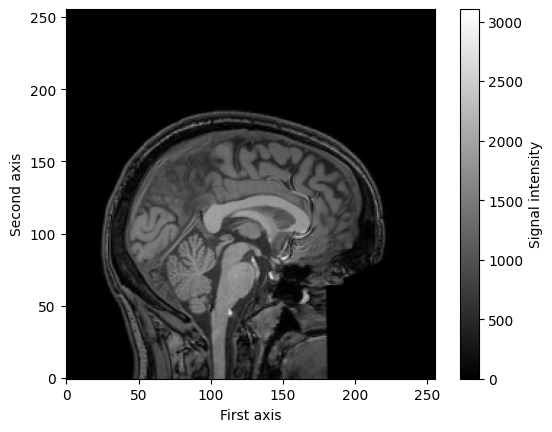

In [ ]:
# Note: we transpose the slice (using .T) before plotting.
# By default, imshow places the first array dimension on the y-axis
# and the second on the x-axis. Here we want the opposite:
# the first dimension on the x-axis and the second on the y-axis.
# We also set origin="lower" because the data is stored in Cartesian coordinates.

plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

### 3. The Affine

In addition to the data and metadata, each NIfTI file also contains an **affine matrix**.  
This matrix defines how image coordinates (voxel indices) map onto real-world coordinates.  

That may sound a bit abstract (it certainly did to us at first!), so let’s look at a concrete example where the affine matters.  

Imagine you receive a NIfTI file from a colleague (we’ll use the `img` variable here to represent it). You don’t know whether it even contains a brain scan, so you decide to inspect it by plotting three slices — one from each axis.  

For instance:  
- slice 70 (index 69, since Python uses zero-based indexing) along the first axis  
- slice 100 along the second axis  
- slice 100 along the third axis  

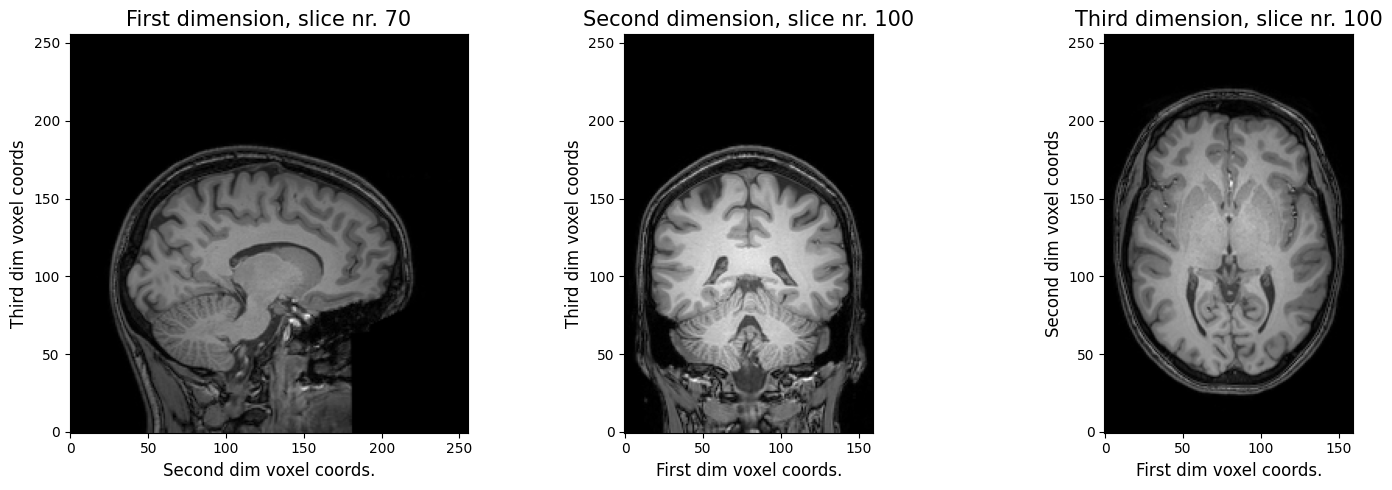

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(img_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(img_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

Alright — from the slices you plotted, it’s clear that this is a structural MRI scan.  
You can tell that:  
- the first voxel axis corresponds to the **sagittal** plane (left ↔ right)  
- the second voxel axis corresponds to the **coronal** plane (posterior ↔ anterior)  
- the third voxel axis corresponds to the **axial** plane (inferior ↔ superior)  

So far, so good!  

But here’s a tricky question: *in the first plot, are we looking at the left or the right side of the brain?*  
Because the brain is roughly symmetrical left-to-right, this is impossible to know from voxel indices alone.  

That’s where the **affine matrix** comes in. It tells us how voxel coordinates map onto **real-world coordinates** — in other words, whether “left” in voxel space corresponds to “left” in physical space.  

In this context, *real-world space* refers to the voxel positions (in millimetres) relative to the **scanner isocenter**. By convention:  
- the point $(0, 0, 0)$ is the isocenter  
- the first axis runs left → right  
- the second axis runs posterior → anterior  
- the third axis runs inferior → superior  

This is known as the **RAS+ convention**, which means:  
- positions to the **Right, Anterior, Superior** of the isocenter are positive (+)  
- positions to the **Left, Posterior, Inferior** are negative (–)

**In short**: Left = negative x, Right = positive x




Now, suppose you want to know whether the sagittal slice shown in the leftmost plot of the previous figure corresponds to the **left** or **right** side of the brain.  

In other words, we want to determine the real-world $x$ coordinate for the voxel index $i = 69$.  
For the other two dimensions, we’ll choose the middle voxel indices ($j = 119$, $k = 109$).  
The resulting 3D coordinate will be highlighted in red in the plot below.

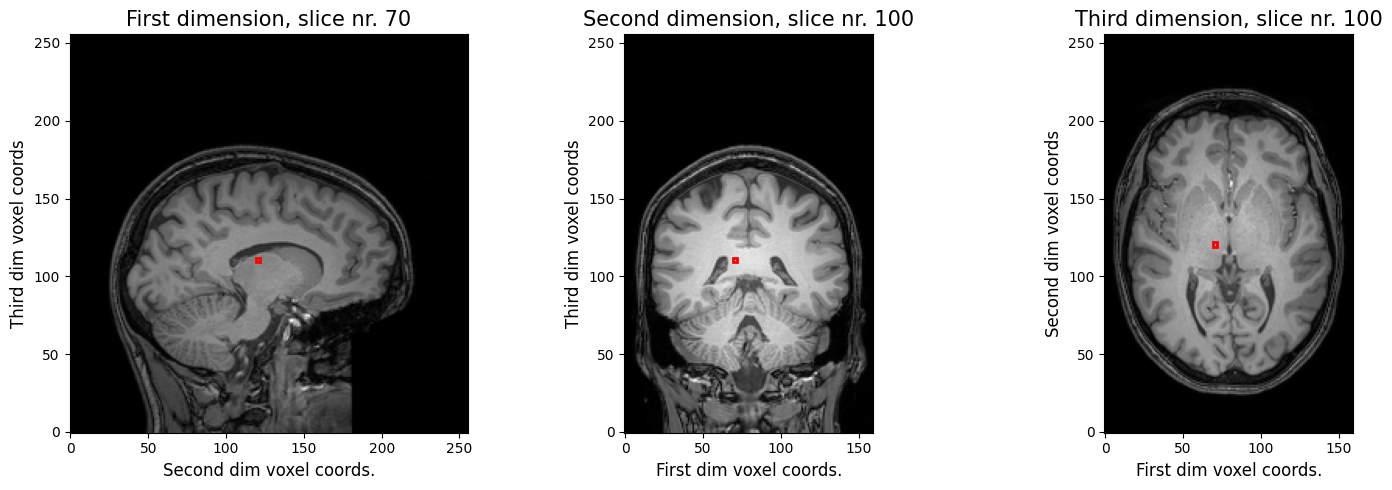

In [ ]:
import matplotlib.patches as patches
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)
rect = patches.Rectangle((119, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(img_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(img_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 119), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)

fig.tight_layout()

## Plotting Data using Nilearn
So far, we used **matplotlib** to visualise the data. While **matplotlib** is very flexible, there are more specialised packages that make plotting brain images a bit easier. We'll be using **[nilearn](https://nilearn.github.io/stable/index.html)** for a lot of the course. This package has not only super useful functions for plotting, but also includes all of the necssary functionality for many basic and advanced analyses.

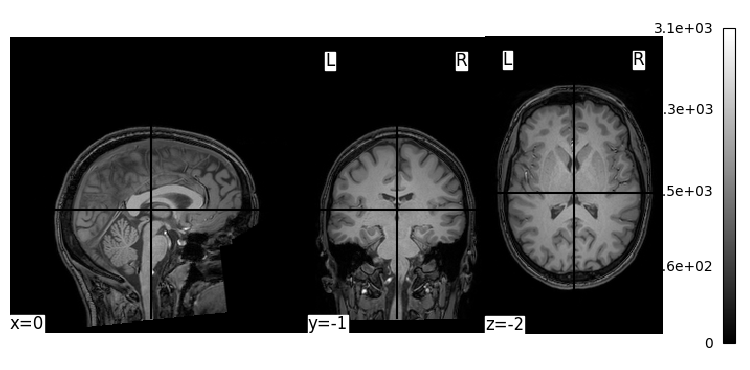

In [ ]:
# Importing the plotting function from nilearn
from nilearn import plotting

# Plotting the image
plotting.plot_img(img)

The **nilearn** plot can be adjusted by changing the plotting parameters:

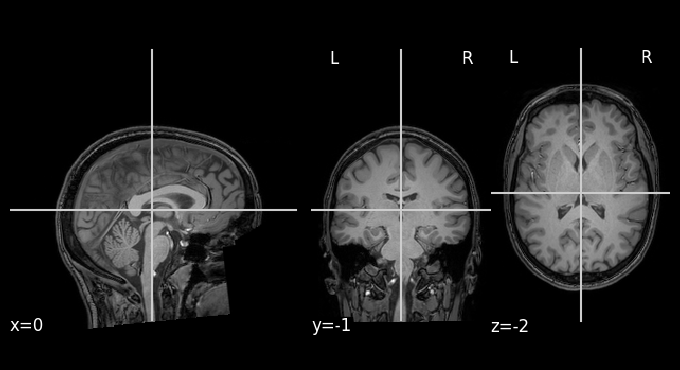

In [ ]:
plotting.plot_img(
    img,
    display_mode='ortho', # Changes the type of plot
    annotate=True, # Add L/R annotation
    draw_cross=True, # Draw the coordinate cross
    black_bg=True, # Include a black background or not
    colorbar=False, # Do not include a colour bar
    vmin=0, # Minimum value for the colour range
    vmax=3e3 # Maximum value for the colour range
)


**Your Turn**: Experiment with the different visualisation options in **nilearn**. For instance, try out the *mosaic* view, or adjust the colour value range.

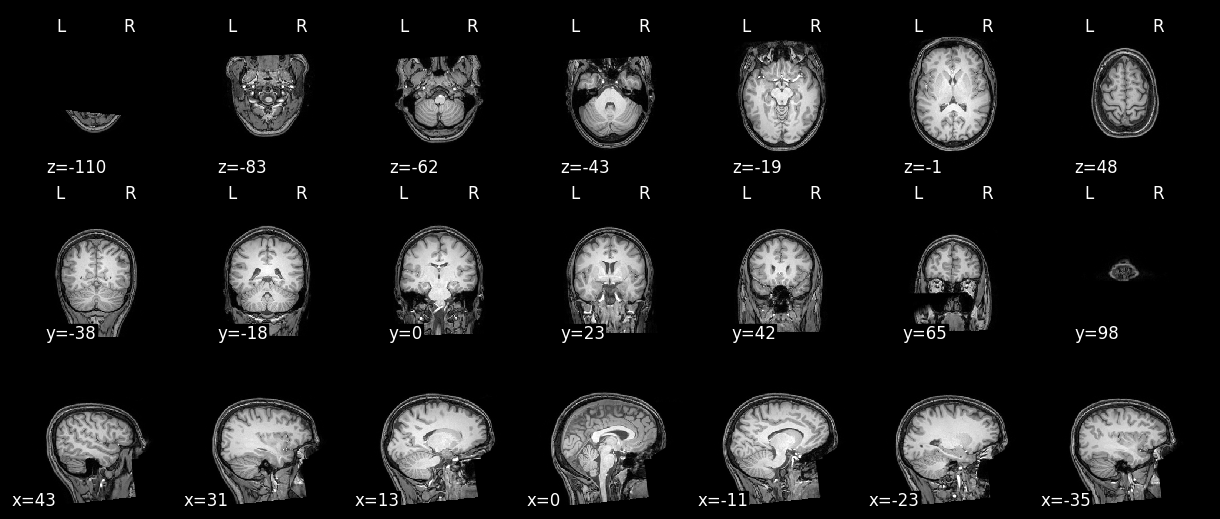

In [ ]:
plotting.plot_img(
    img,
    display_mode='mosaic', # Changes the type of plot
    annotate=True, # Add L/R annotation
    draw_cross=True, # Draw the coordinate cross
    black_bg=True, # Include a black background or not
    colorbar=False, # Do not include a colour bar
    vmin=0, # Minimum value for the colour range
    vmax=2e3 # Maximum value for the colour range
)

### Normalisation

What do these raw intensity values actually mean? The honest answer is: not much on their own. The numbers you see are arbitrary artifacts of the scanning process—they're influenced by the specific MRI sequence, where the participant's head was positioned in the scanner, and the mathematical reconstruction used to create the image. This creates two practical problems. First, we can't meaningfully compare raw values across different scans. Second, it's hard to choose sensible display ranges when every image uses a different scale.

Normalisation solves this by rescaling values to a common, interpretable range. The most common approach scales values so that the brightest voxels (typically in cerebrospinal fluid or white matter, depending on the sequence) reach a maximum of 1.0, while the dimmest background voxels are set to 0. This gives us a consistent 0-1 scale across all images, making visual comparison straightforward and setting clear display boundaries.

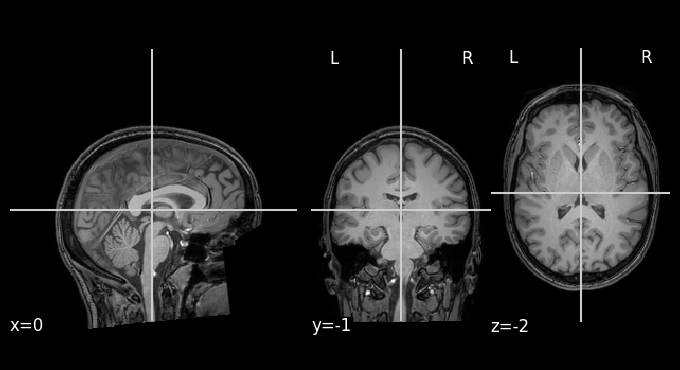

In [ ]:
img_data = img.get_fdata()
img_data = img_data / img_data.max()
img = nib.Nifti1Image(img_data, img.affine)

plotting.plot_img(
    img,
    display_mode='ortho', # Changes the type of plot
    annotate=True, # Add L/R annotation
    draw_cross=True, # Draw the coordinate cross
    black_bg=True, # Include a black background or not
    colorbar=False, # Do not include a colour bar
    vmin=0, # Minimum value for the colour range
    vmax=0.6 # Maximum value for the colour range
)

### Brain Masking
Most neuroimaging analyses require us to isolate brain tissue from the surrounding skull, scalp, and other non-brain structures—a process called "skull-stripping" or "brain extraction." This step is important because non-brain tissues can introduce unwanted variability. For example, when aligning different people's brain images to a common template, individual differences in skull shape or scalp thickness could affect the alignment but aren't relevant to our questions about brain structure. By removing these tissues first, we ensure our analysis focuses on actual brain differences rather than anatomical variations outside the brain.

A brain mask is simply an image that contains with 1 (brain) and 0 (not brain). We will cover how these masks are generated next week. For now, we'll apply an existing mask to the image.

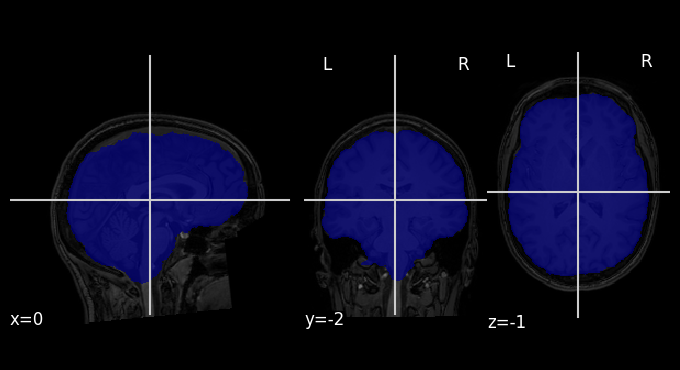

In [ ]:
# Let's first look at the brain mask overlaid on the anatomical image
plotting.plot_roi('anat_mask.nii.gz', img, colorbar=False)

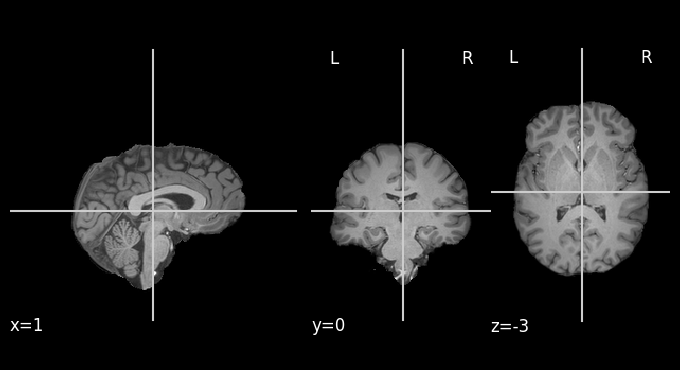

In [ ]:
# Next, let's apply the mask and plot the skull-stripped image
mask_data = nib.load('anat_mask.nii.gz').get_fdata()
brain_img_data = img_data * mask_data
brain_img = nib.Nifti1Image(brain_img_data, img.affine)

plotting.plot_img(
    brain_img,
    display_mode='ortho', # Changes the type of plot
    annotate=True, # Add L/R annotation
    draw_cross=True, # Draw the coordinate cross
    black_bg=True, # Include a black background or not
    colorbar=False, # Do not include a colour bar
    vmin=0, # Minimum value for the colour range
    vmax=0.6 # Maximum value for the colour range
)


Now, we can assess the distribution of different values in this images, which gives us some indication of the quantity of different tissue types.

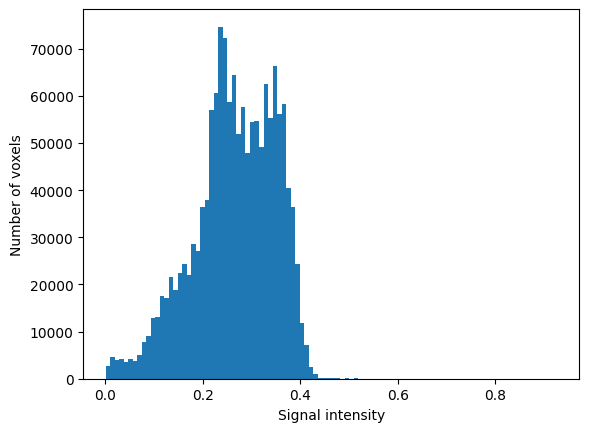

In [ ]:
img_values = brain_img.get_fdata().flatten() # Flatten the array to make it 1D
img_values = img_values[img_values > 0] # Remove the background
plt.hist(img_values, bins=100)
plt.xlabel('Signal intensity')
plt.ylabel('Number of voxels')
plt.show()

**Bonus Question**: What could might be the reason for the different peaks in the histogram above?

**Answer**: The different peaks probably correspond to grey matter and white matter.

## Final Exercise: Individual Differences in Brain Structure

Now that you've learned the basics of loading, visualizing, and processing structural MRI data, let's explore a fundamental question in neuroimaging: **How much do brains differ between individuals?**

### The Task

1. Download data from a second participants below
2. Load both scans (the original `anat.nii.gz` and the new `anat2.nii.gz`) and create a side-by-side comparison visualization using nilearn.
3. Create a markdown cell below your visualization and answer these questions:
   - What structural differences can you observe between the two brains?
   - Are the overall shapes similar or different?
   - Do you notice differences in specific regions (e.g., frontal lobes, ventricles)?
   - Given these structural differences, do you think we can directly compare brain activity between individuals? Why or why not?
4. Calculate and compare one simple metric between the two brains:
   - Option A: Total brain volume (hint: count non-zero voxels in the masked brain, multiply by voxel volume from header)
   - Option B: Brain intensity histogram (hint: use `plt.hist()` on the masked, normalized data)
   - Option C: Ventricle size (hint: look for the darkest voxels inside the brain)

In [ ]:
# Downloading some required data
download_file(
    "https://www.dropbox.com/scl/fi/rkyxtm2ykaztjcu69qrah/sub-0002_run-1_T1w.nii.gz?rlkey=y9iu366wl8fq245s6bfpj64v8&dl=1",
    "anat2.nii.gz"
)

download_file(
    "https://www.dropbox.com/scl/fi/3hfaqgrvf3kszf1kuzbqq/sub-0002_run-1_T1w_brain_mask.nii.gz?rlkey=20humj2l6w36vf46v6gr4zozb&dl=1",
    "anat_mask2.nii.gz"
)

anat2.nii.gz already exists, skipping download.
anat_mask2.nii.gz already exists, skipping download.


In [ ]:
# Processing Participant 1 again for consistency
img1 = nib.load('anat.nii.gz') # Load the image file
img1_data = img1.get_fdata() # Get the image values
img1_mask = nib.load('anat_mask.nii.gz').get_fdata() # Get the mask values (notice that I chained the commands)
img1_masked = img1_data*img1_mask # Apply the mask
img1_masked_normed = img1_masked / img1_masked.max() # Normalise
img1_masked_normed_nifti = nib.Nifti1Image(img1_masked_normed, affine=img1.affine) # Turn into NiFTI image

# Process Participant 2
img2 = nib.load('anat2.nii.gz') # Load the image file
img2_data = img2.get_fdata() # Get the image values
img2_mask = nib.load('anat_mask2.nii.gz').get_fdata() # Get the mask values (notice that I chained the commands)
img2_masked = img2_data*img2_mask # Apply the mask
img2_masked_normed = img2_masked / img2_masked.max() # Normalise
img2_masked_normed_nifti = nib.Nifti1Image(img2_masked_normed, affine=img2.affine)

plotting.plot_img(
    img1_masked_normed_nifti,
    display_mode='mosaic', # Changes the type of plot
    annotate=True, # Add L/R annotation
    draw_cross=True, # Draw the coordinate cross
    black_bg=True, # Include a black background or not
    colorbar=False, # Do not include a colour bar
    vmin=0, # Minimum value for the colour range
    vmax=0.6, # Maximum value for the colour range
    title='Participant 1'
)

plotting.plot_img(
    img2_masked_normed_nifti,
    display_mode='mosaic', # Changes the type of plot
    annotate=True, # Add L/R annotation
    draw_cross=True, # Draw the coordinate cross
    black_bg=True, # Include a black background or not
    colorbar=False, # Do not include a colour bar
    vmin=0, # Minimum value for the colour range
    vmax=0.6, # Maximum value for the colour range
    title='Participant 2'
)

NameError: name 'plotting' is not defined

Observations:
- The images look quite similar
- Participant 2 has lower intensity values overall
- The brains look comparable

In [ ]:
# Total Brain Volume
# We can use the brain masks for this – they are binary volumes that tell us where the brain is

# Check the voxel sizes
print(nib.load('anat_mask.nii.gz').header.get_zooms())

# Count the number of voxels in the mask
volume = np.sum(img1_mask)
volume2 = np.sum(img2_mask)

print('Participant 1 - Brain volume (mm): %i' % volume)
print('Participant 2 - Brain volume (mm): %i' % volume2)


(np.float32(1.0), np.float32(1.0), np.float32(1.0))


NameError: name 'img1_mask' is not defined

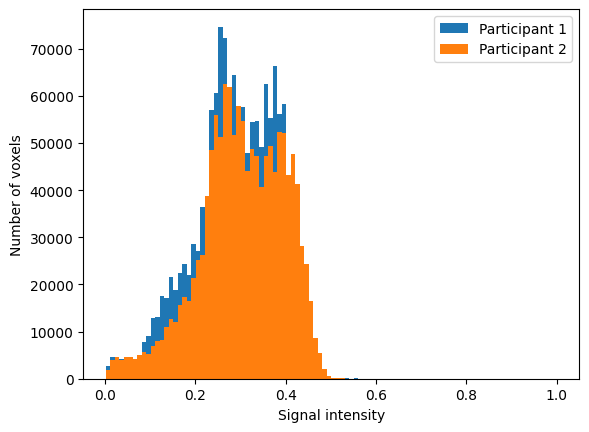

In [ ]:
img1_masked_normed_flattened = img1_masked_normed.flatten() # Flatten the array to make it 1D
img1_masked_normed_flattened = img1_masked_normed_flattened[img1_masked_normed_flattened > 0] # Remove the background

img2_masked_normed_flattened = img2_masked_normed.flatten() # Flatten the array to make it 1D
img2_masked_normed_flattened = img2_masked_normed_flattened[img2_masked_normed_flattened > 0] # Remove the background

plt.hist(img1_masked_normed_flattened, bins=100, label="Participant 1")
plt.hist(img2_masked_normed_flattened, bins=100, label="Participant 2")
plt.xlabel('Signal intensity')
plt.ylabel('Number of voxels')
plt.legend()
plt.show()

Participant 1 - Ventricle volume (voxels): 240915
Participant 2 - Ventricle volume (voxels): 168836


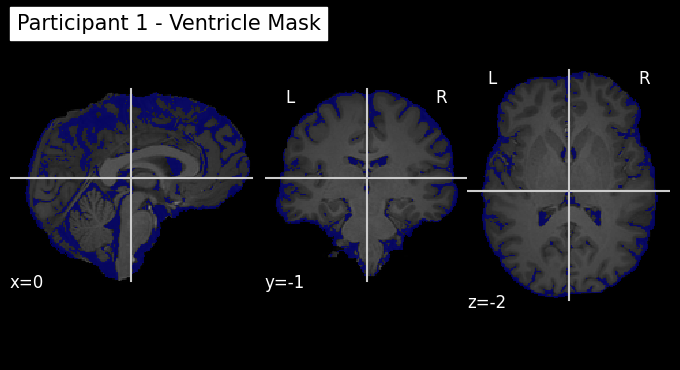

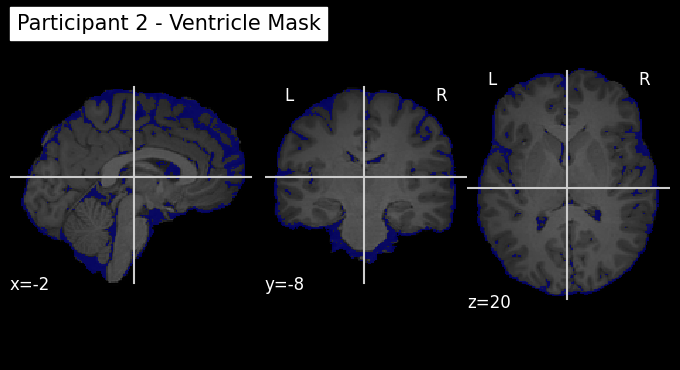

In [ ]:
from nilearn import plotting

# Create a ventricle mask for Participant 1
# Ventricles contain CSF, which appears dark on T1-weighted images.
# We select voxels that are inside the brain (mask > 0) but have low intensity.
ventricle_mask1 = (img1_masked_normed > 0.01) & (img1_masked_normed < 0.2)
ventricle_mask1 = ventricle_mask1.astype(np.float64)

# Create a CSF mask for Participant 2
ventricle_mask2 = (img2_masked_normed > 0.01) & (img2_masked_normed < 0.2)
ventricle_mask2 = ventricle_mask2.astype(np.float64)

# Turn masks into NIfTI images for plotting
ventricle_nifti1 = nib.Nifti1Image(ventricle_mask1, affine=img1.affine)
ventricle_nifti2 = nib.Nifti1Image(ventricle_mask2, affine=img2.affine)

# Plot the CSF masks overlaid on the anatomical images
plotting.plot_roi(ventricle_nifti1, img1_masked_normed_nifti, title='Participant 1 - Ventricle Mask', colorbar=False)
plotting.plot_roi(ventricle_nifti2, img2_masked_normed_nifti, title='Participant 2 - Ventricle Mask', colorbar=False)

# Compare ventricle sizes
print('Participant 1 - Ventricle volume (voxels): %i' % np.sum(ventricle_mask1))
print('Participant 2 - Ventricle volume (voxels): %i' % np.sum(ventricle_mask2))